## Covid-19 Data
Data obtained from the New York Times dataset: 
https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv

In [11]:
import io
import pandas as pd
import numpy as np
import scipy as sp
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import lxml
import re

In [12]:
%matplotlib inline

In [13]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
cdata = pd.read_csv(url)

### County + State Data 
Enter the state and county names in the following cell. Run the next two cells to see relevant state/county data.

In [14]:
state_name = 'Colorado'
county_name = 'Denver'

Denver County
2020-03-29: 408 cases, 5 deaths


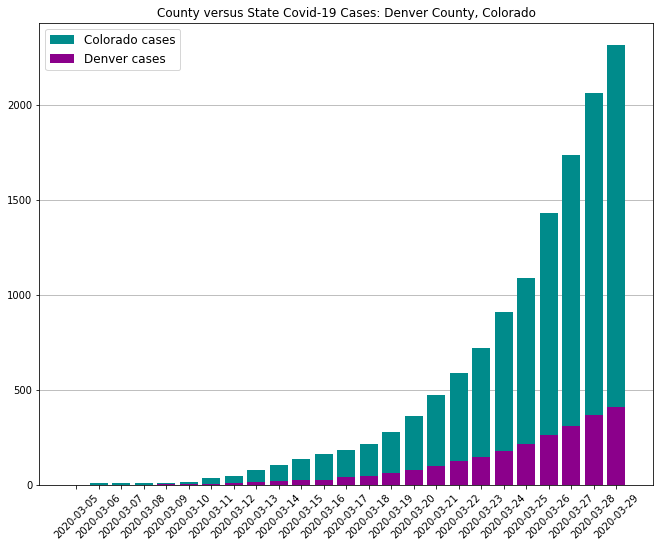

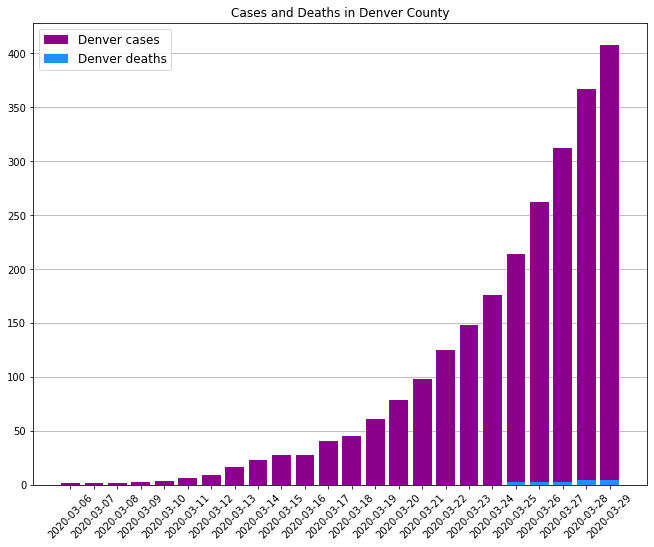

In [15]:
dfcounties = cdata[cdata['state'] == state_name]
dfstate = dfcounties.groupby(['date'])[['cases', 'deaths']].sum()

if county_name in dfcounties['county'].tolist():
    coflag = 1
    dfco = dfcounties[dfcounties['county'] == county_name]
    latest = dfco.iloc[-1].tolist()
    print(latest[1], "County")
    print("{}: {} cases, {} deaths".format(latest[0], latest[4], latest[5]))
    title = "County versus State Covid-19 Cases: {} County, {}".format(county_name, state_name)
else: 
    coflag = 0
    latest = dfstate.iloc[-1]
    print("{}\n{}: {} cases, {} deaths".format(state_name, latest.name, latest.cases, latest.deaths))
    title = "Covid-19 Cases in {}".format(state_name)


# plot state cases vs county cases
fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
ax.bar(dfstate.index.tolist(), 
       dfstate['cases'], 
       label="%s cases" % state_name, 
       color='darkcyan')
if coflag:
    ax.bar(dfco[dfco['county'] == county_name]['date'], 
           dfco[dfco['county'] == county_name]['cases'], 
           label='%s cases' % county_name, 
           color='darkmagenta')
else:
    ax.bar(dfstate.index.tolist(),
           dfstate['deaths'],
           label="%s deaths" % state_name,
           color='darkslategrey')
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.title(title)
plt.xticks(rotation=45, fontsize='medium')
plt.legend(loc=2, fancybox=True, fontsize='large')
plt.show()

# plot county cases vs deaths
if coflag:
    fig1, ax1 = plt.subplots()
    fig1.set_size_inches(11, 8.5)
    ax1.bar(dfco[dfco['county'] == county_name]['date'], 
           dfco[dfco['county'] == county_name]['cases'], 
           label='%s cases' % county_name, 
           color='darkmagenta')
    ax1.bar(dfco[dfco['county'] == county_name]['date'], 
           dfco[dfco['county'] == county_name]['deaths'], 
           label='%s deaths' % county_name, 
           color='dodgerblue')
    ax1.grid(axis='y')
    ax1.set_axisbelow(True)
    plt.title("Cases and Deaths in {} County".format(county_name))
    plt.xticks(rotation=45, fontsize='medium')
    plt.legend(loc=2, fancybox=True, fontsize='large')
    plt.show()
